In [19]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
from sklearn import set_config; set_config(display='diagram')
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler, RobustScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import SelectPercentile, VarianceThreshold, SelectFromModel, mutual_info_classif

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Importing Data

In [20]:
from src.getdata_utils import load_data, split_data

In [ ]:
filepath="../data/bank-full.csv"
df_bank = pd.read_csv(filepath, sep=';', header=0)
df_bank[df_bank['y'] == 'yes'].head(50)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
86,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
270,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
388,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
390,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
446,39,technician,single,unknown,no,45248,yes,no,unknown,6,may,1623,1,-1,0,unknown,yes
457,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes


In [21]:
X, y = load_data()
X_train, X_val, X_test, y_train, y_val, y_test = split_data(X, y)

In [41]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,3,-1,0,unknown
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,2,-1,0,unknown
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,4,-1,0,unknown


# Data Cleaning

In [22]:
from src.training_utils import CyclicalMonthEncoder

CyclicalMonthEncoder()

,column_name,'month'


In [23]:
from src.training_utils import build_preprocessor, fit_and_return_preprocessed_df

# 5. Build the preprocessor based on training data
preprocessor = build_preprocessor(X_train)

# 6. Fit and transform X_train
X_train_df = fit_and_return_preprocessed_df(preprocessor, X_train)

In [24]:
X_train_df

,categorical_features__contact_cellular,categorical_features__contact_telephone,categorical_features__contact_unknown,categorical_features__default_yes,categorical_features__education_primary,categorical_features__education_secondary,categorical_features__education_tertiary,categorical_features__education_unknown,categorical_features__housing_yes,categorical_features__job_admin.,...,categorical_features__poutcome_success,categorical_features__poutcome_unknown,num_transformer__age,num_transformer__balance,num_transformer__day,num_transformer__campaign,num_transformer__pdays,num_transformer__previous,month_transformer__month_sin,month_transformer__month_cos
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.266667,1.496211,-0.307692,-0.5,0.0,0.0,1.224647e-16,-1.000000
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.066667,0.164110,-0.538462,-0.5,0.0,0.0,1.224647e-16,-1.000000
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.000000,2.491961,0.692308,2.0,0.0,0.0,-8.660254e-01,-0.500000
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.200000,-0.096101,0.846154,0.0,0.0,0.0,-8.660254e-01,-0.500000
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,-0.533333,0.130845,0.538462,1.0,0.0,0.0,5.000000e-01,-0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27121,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,-0.400000,0.799852,-0.538462,-0.5,93.0,3.0,8.660254e-01,0.500000
27122,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.533333,-0.228424,0.076923,-0.5,0.0,0.0,1.224647e-16,-1.000000
27123,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.133333,0.382924,1.076923,0.0,0.0,0.0,5.000000e-01,0.866025
27124,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-0.133333,-0.024395,1.076923,0.0,0.0,0.0,5.000000e-01,-0.866025


# Logistic Regression

In [ ]:
from src.model import build_logreg_pipeline, evaluate_model
logreg_pipeline = build_logreg_pipeline(preprocessor, max_iter=1000, random_state=42)

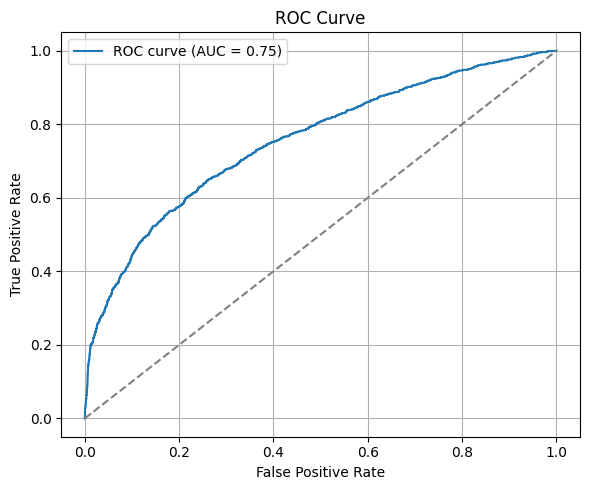

Accuracy: 0.8943817739438178
Balanced Accuracy: 0.5810639473654303
Precision: 0.6973180076628352
Recall: 0.1720226843100189
F1 Score: 0.2759666413949962
F0.5-Score: 0.4329210275927688
ROC AUC: 0.7545174233154399


In [26]:
# Fit your model
logreg_pipeline.fit(X_train, y_train)

# Predict class labels
y_pred = logreg_pipeline.predict(X_val)

# Predict probabilities for ROC-AUC
y_proba = logreg_pipeline.predict_proba(X_val)[:, 1]

# Evaluate
metrics = evaluate_model(y_val, y_pred, y_proba=y_proba, beta=0.5, plot_roc=True)
for metric, value in metrics.items():
    print(f"{metric}: {value}")


In [35]:
import pickle

my_object = logreg_pipeline
file_path = '../models/log_pipeline_20250807.pkl'

with open(file_path, 'wb') as file:
    pickle.dump(my_object, file)

In [36]:
with open(file_path, 'rb') as file:
    loaded_log_model = pickle.load(file)

In [37]:
loaded_log_model

,steps,"[('preprocessing', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('categorical_features', ...), ('num_transformer', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


# Baseline Model
## Always predic the majority class

In [27]:
# Let's say y_val contains the true values
y_baseline = np.zeros_like(y_val)  # predict "0" for all (no investment)

# Evaluate it
baseline_results = {
    "Accuracy": accuracy_score(y_val, y_baseline),
    "Precision": precision_score(y_val, y_baseline, zero_division=0),
    "Recall": recall_score(y_val, y_baseline),
    "F1 Score": f1_score(y_val, y_baseline),
    "ROC AUC": roc_auc_score(y_val, y_baseline) if len(np.unique(y_val)) == 2 else "N/A"
}

for metric, value in baseline_results.items():
    print(f"{metric}: {value}")

Accuracy: 0.8829904888299049
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC: 0.5


# Neural Network

In [49]:
### Classification with 2 classes
from tensorflow.keras import Sequential, layers, Input
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Input(shape=(15,)))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(3, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2025-08-07 21:30:06.178583: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-07 21:30:06.185475: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-07 21:30:06.196651: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-07 21:30:06.223230: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754616606.267184   14884 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754616606.27

In [28]:
# I am testing again with the newly installed packages
# pip install nbdime
# nbdime config-git --enable
